In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
X_test = pd.read_csv("test.csv")
X_train = pd.read_csv("train.csv")

In [3]:
clf = IsolationForest(contamination=0.001, random_state=16).fit(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


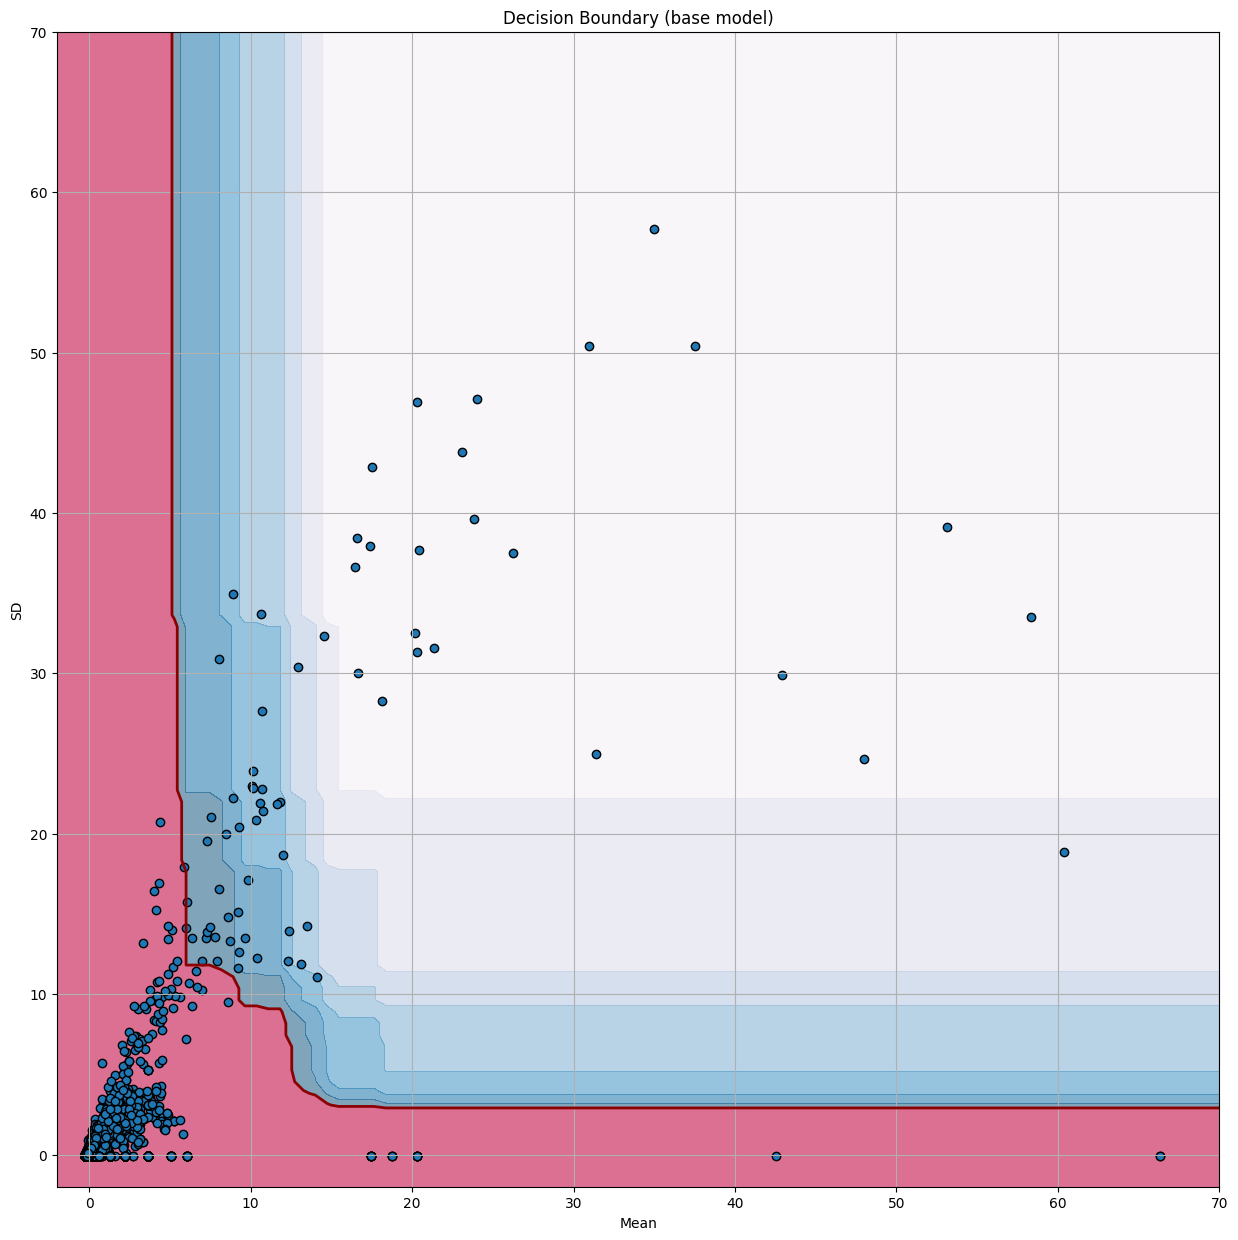

In [4]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [5]:
test_predictions=clf.predict(X_test)

In [6]:
X_preds = pd.concat([X_test, pd.Series(test_predictions)], axis=1)

In [7]:
X_preds.head()

,mean,sd,0
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


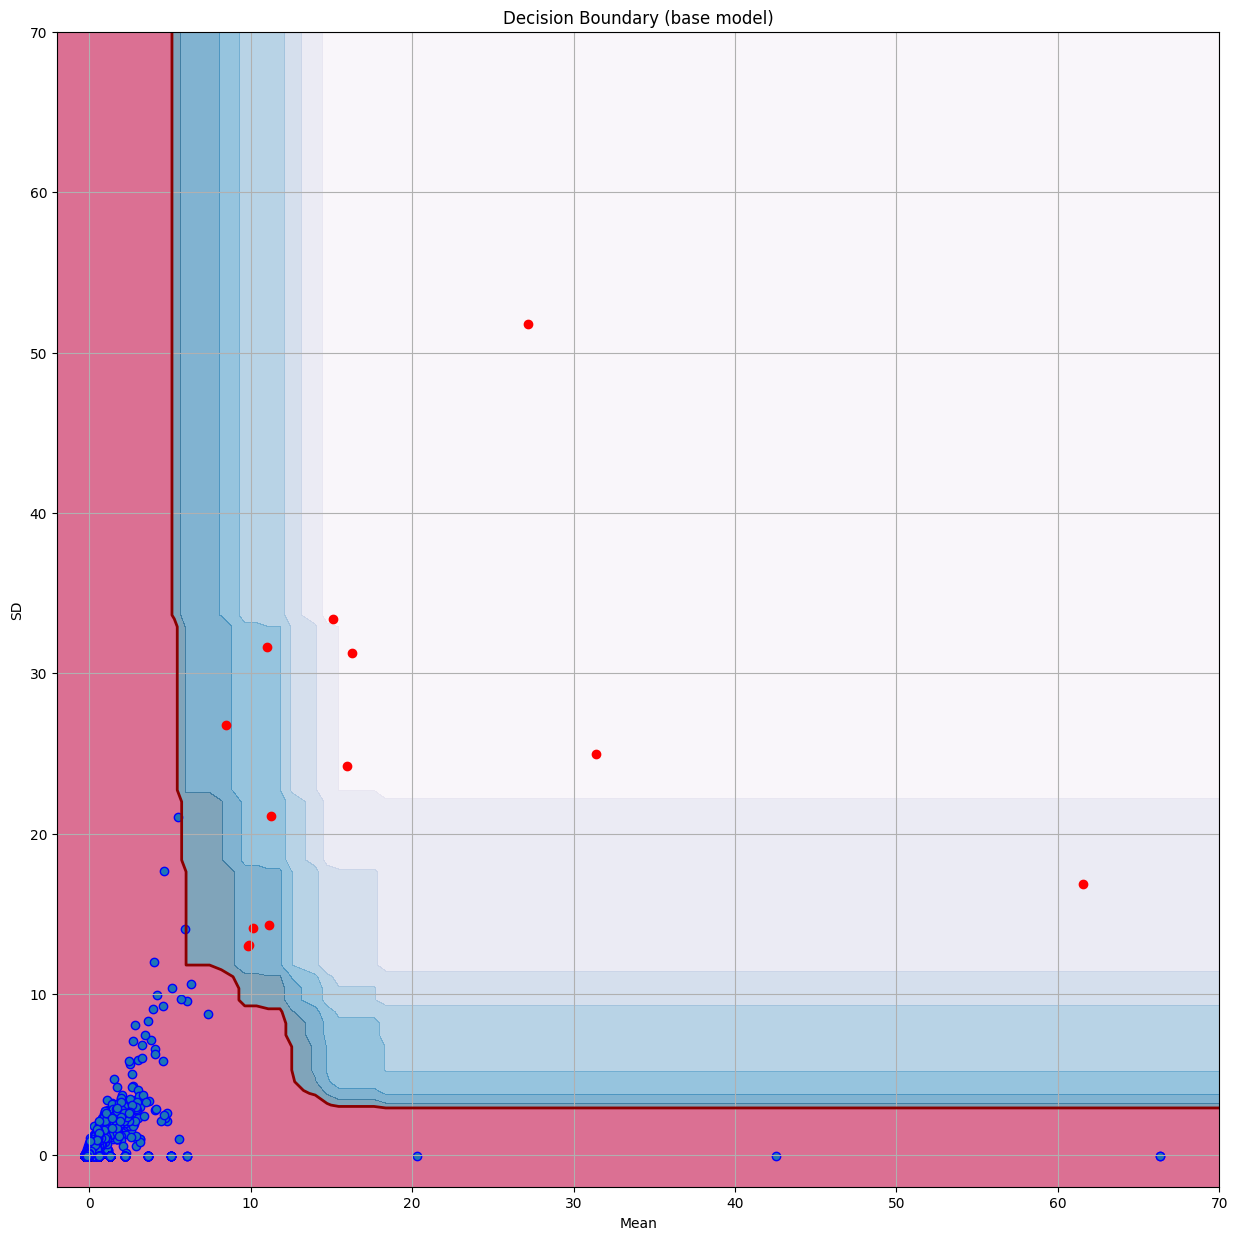

In [22]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

inliers = X_preds[X_preds.iloc[:,2] == -1]
outliers = X_preds[X_preds.iloc[:,2] == 1]


plt.scatter(inliers.iloc[:, 0],
            inliers.iloc[:, 1],
            color='red')


plt.scatter(outliers.iloc[:, 0],
            outliers.iloc[:, 1],
            edgecolors='blue')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [ ]:
from joblip import dump, load
dump(clf, 'IsolationForest1.joblib')